In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# Import bagging tree and random forest classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
X = df.loc[:, df.columns != 'target']
X.shape

(569, 30)

In [5]:
y = df.loc[:,'target'].values
y.shape

(569,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=3)

In [7]:
clf = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)
clf

RandomForestClassifier(oob_score=True)

In [8]:
clf.fit(X_train, y_train)
clf.predict(X_test.iloc[0].values.reshape(1,-1)) # single prediction

array([1])

In [9]:
clf.predict(X_test[0:10])

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [10]:
pd.DataFrame(y_train)[0].value_counts(dropna=False)

1    267
0    159
Name: 0, dtype: int64

In [11]:
267 / (267 + 159) # null accuracy

0.6267605633802817

In [12]:
score = clf.score(X_test, y_test)
score

0.9370629370629371

In [17]:
clf.oob_score_ #out of bag score

0.9624413145539906

In [ ]:
estimator_range = [1] + list(range(10,310,10))
estimator_range

In [19]:
scores = []
for estimator in estimator_range:
    clf = RandomForestClassifier(n_estimators=estimator, random_state=1, bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))


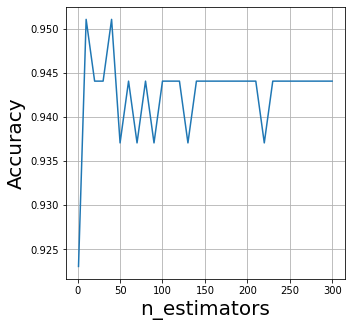

In [20]:
fix, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 20)
axes.set_ylabel('Accuracy', fontsize = 20)
axes.grid()

In [22]:
scores[:5]

[0.9230769230769231,
 0.951048951048951,
 0.9440559440559441,
 0.9440559440559441,
 0.951048951048951]

In [23]:
estimator_range[:5]

[1, 10, 20, 30, 40]